In [8]:
import pandas as pd
import numpy as np
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("talk")
sns.set_style("white")

In [9]:
def generate_equity_scores(N, a,b):
    return np.random.beta(a, b, size=N)
    
def seen_this_round(equity_scores):
    rand_arr = np.random.rand(*equity_scores.shape)
    seen = np.zeros_like(equity_scores)
    seen[rand_arr < equity_scores] = 1
    return seen

def total_seen_over_rounds(equity_scores):
    N = int(len(equity_scores))
    total_seen = np.zeros(N)
    for i in range(4):
        total_seen += seen_this_round(equity_scores)
        
    # Get the unique values and their counts
    unique_vals, counts = np.unique(total_seen, return_counts=True)

    return_dict = {}
    
    # Print the results
    for val, count in zip(unique_vals, counts):
        return_dict[val] = count/N
    return return_dict

def loss_function(a,b):
    N = int(1e6)
    equity_scores = generate_equity_scores(N,a,b)
    sim_dict = total_seen_over_rounds(equity_scores)
    
    data_dict = {0: 0.07,
                 1: 0.04,
                 2: 0.23,
                 3: 0.32,
                 4: 0.32}
    
    diff_squared_sum = 0
    for key in data_dict.keys():
        if key in sim_dict:
            diff_squared_sum += (data_dict[key] - sim_dict[key])**2
            
    return diff_squared_sum

In [10]:
# Set up Optuna minimization
def objective(trial):
    a = trial.suggest_float('a', 0.01,10)
    b = trial.suggest_float('b', 0.01,10)
    
    return loss_function(a,b)

In [11]:
import optuna

C:\Users\joshsu\venv\iptsc\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [25]:
study = optuna.create_study()
study.optimize(objective, n_trials=1000)

[I 2023-04-20 17:07:53,691] A new study created in memory with name: no-name-75d312fe-5d37-4d75-bf96-1804737192e3
[I 2023-04-20 17:07:53,883] Trial 0 finished with value: 0.027660454426000007 and parameters: {'a': 8.260017641430535, 'b': 2.113930736346861}. Best is trial 0 with value: 0.027660454426000007.
[I 2023-04-20 17:07:54,059] Trial 1 finished with value: 0.03221460818 and parameters: {'a': 9.003238076643678, 'b': 2.1934810501998685}. Best is trial 0 with value: 0.027660454426000007.
[I 2023-04-20 17:07:54,241] Trial 2 finished with value: 0.17923084371400003 and parameters: {'a': 5.9323029093259905, 'b': 8.24702953300446}. Best is trial 0 with value: 0.027660454426000007.
[I 2023-04-20 17:07:54,475] Trial 3 finished with value: 0.123702214362 and parameters: {'a': 0.5513214679081501, 'b': 0.707749452568101}. Best is trial 0 with value: 0.027660454426000007.
[I 2023-04-20 17:07:54,675] Trial 4 finished with value: 0.08925984446600001 and parameters: {'a': 4.941380673688716, 'b':

In [26]:
study.best_params

{'a': 5.406246316439349, 'b': 2.1502419999150257}

In [49]:
a = 5.406246316439349
b = 2.1502419999150257

In [50]:
loss_function(a, b)

0.005796276174

In [51]:
foo = generate_equity_scores(int(1e6), a,b)
sim_dict = total_seen_over_rounds(foo)

In [52]:
    data_dict = {0: 0.07,
                 1: 0.04,
                 2: 0.23,
                 3: 0.32,
                 4: 0.32}

In [53]:
sim_dict.values()

dict_values([0.022046, 0.093618, 0.215799, 0.338331, 0.330206])

Text(0.5, 1.0, 'R21 data')

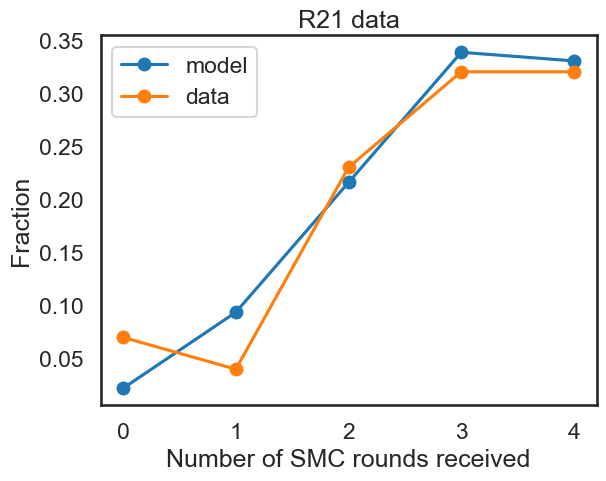

In [54]:
plt.plot(np.array([0,1,2,3,4]), np.array(list(sim_dict.values())), marker='o', label='model')
plt.plot(np.array([0,1,2,3,4]), np.array(list(data_dict.values())), marker='o', label='data')
plt.legend()
plt.xlabel("Number of SMC rounds received")
plt.ylabel("Fraction")
plt.title("R21 data")

(0.0, 1.0)

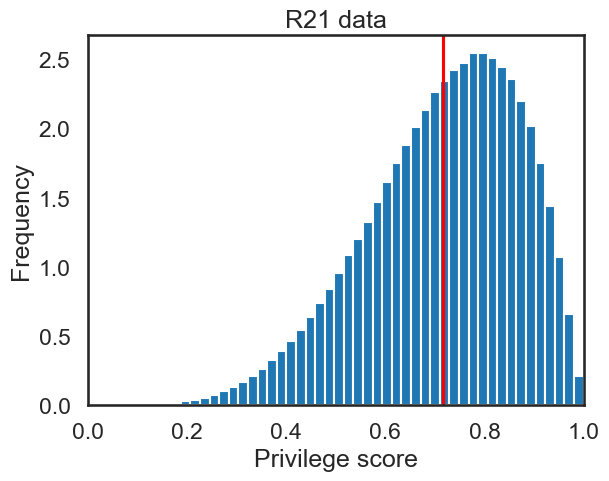

In [55]:
plt.hist(foo, bins=50, density=True)
plt.xlabel("Privilege score")
plt.ylabel("Frequency")
plt.axvline(np.mean(foo), color='red')
plt.title("R21 data")
plt.xlim([0,1])

In [25]:
np.mean(foo)

0.7152826898403847

R21 trial data suggests mean coverage of ~72% per round, but with lots of spread in equity

What does the other trial data suggest?

In [26]:
def loss_function_MC(a,b):
    N = int(1e6)
    equity_scores = generate_equity_scores(N,a,b)
    sim_dict = total_seen_over_rounds(equity_scores)
    
    data_dict = {0: 0.0918,
                 1: 0.0358,
                 2: 0.0433,
                 3: 0.0817,
                 4: 0.7474}
    
    diff_squared_sum = 0
    for key in data_dict.keys():
        if key in sim_dict:
            diff_squared_sum += (data_dict[key] - sim_dict[key])**2
            
    return diff_squared_sum

In [47]:
# Set up Optuna minimization
def objective_MC(trial):
    a = trial.suggest_float('a', 0.01,10)
    b = trial.suggest_float('b', 0.01,10)
    
    return loss_function_MC(a,b)

study = optuna.create_study()
study.optimize(objective_MC, n_trials=1000)

[I 2023-04-20 17:22:17,551] A new study created in memory with name: no-name-2e0140e8-5c61-4a5c-9de7-42468a92c065
[I 2023-04-20 17:22:17,765] Trial 0 finished with value: 0.6786355191219998 and parameters: {'a': 3.75063809841598, 'b': 6.984727682131705}. Best is trial 0 with value: 0.6786355191219998.
[I 2023-04-20 17:22:17,983] Trial 1 finished with value: 0.6912189193319999 and parameters: {'a': 3.3425055666000074, 'b': 6.954007963942741}. Best is trial 0 with value: 0.6786355191219998.
[I 2023-04-20 17:22:18,208] Trial 2 finished with value: 0.743695423126 and parameters: {'a': 3.183714483261909, 'b': 9.27961827807056}. Best is trial 0 with value: 0.6786355191219998.
[I 2023-04-20 17:22:18,458] Trial 3 finished with value: 0.08932593609799999 and parameters: {'a': 2.9896280958183357, 'b': 0.7139446635547958}. Best is trial 3 with value: 0.08932593609799999.
[I 2023-04-20 17:22:18,689] Trial 4 finished with value: 0.016209982790000004 and parameters: {'a': 5.921513241876038, 'b': 0.4

In [54]:
study.best_params['a'], study.best_params['b']

(0.8230689180846718, 0.14462384257452543)

In [36]:
a = 0.8230689180846718
b = 0.14462384257452543

In [40]:
foo = generate_equity_scores(int(1e6), a,b)
sim_dict = total_seen_over_rounds(foo)

In [41]:
sim_dict

{0.0: 0.049535, 1.0: 0.051834, 2.0: 0.06614, 3.0: 0.108979, 4.0: 0.723512}

In [42]:
    data_dict = {0: 0.0918,
                 1: 0.0358,
                 2: 0.0433,
                 3: 0.0817,
                 4: 0.7474}

Text(0.5, 1.0, 'Malaria Consortium data')

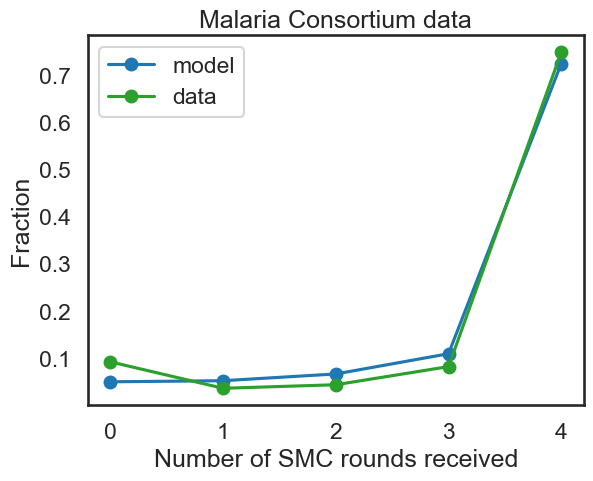

In [43]:
plt.plot(np.array([0,1,2,3,4]), np.array(list(sim_dict.values())), marker='o', label='model')
plt.plot(np.array([0,1,2,3,4]), np.array(list(data_dict.values())), marker='o', label='data', c="C2")
plt.legend()
plt.xlabel("Number of SMC rounds received")
plt.ylabel("Fraction")
plt.title("Malaria Consortium data")

(0.0, 1.0)

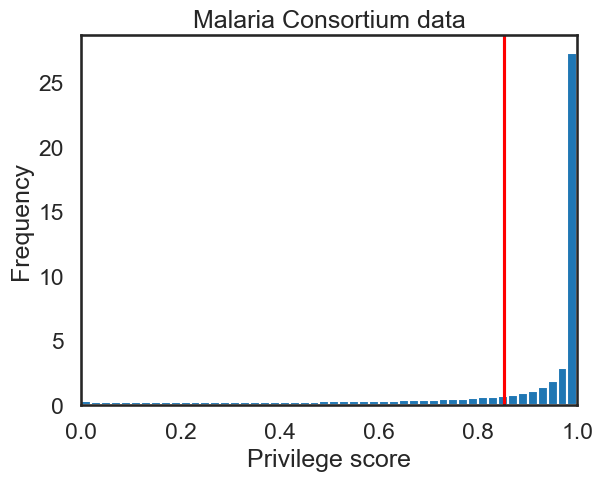

In [46]:
plt.hist(foo, bins=50, density=True)
plt.xlabel("Privilege score")
plt.ylabel("Frequency")
plt.axvline(np.mean(foo), color='red')
plt.title("Malaria Consortium data")
plt.xlim([0,1])